# Getting Data

In [21]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import config

In [22]:
#Authentication - without user
client_credentials_manager = SpotifyClientCredentials(client_id=config.client_id, client_secret=config.client_secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [23]:
# Chill Car - Rap, Bollywood Beats, Lit Songs, Fam Mix, Chill - Pop, Nostalgia, Epic Vibes, Nostalgic EDM 
playlist_links = ["https://open.spotify.com/playlist/39yrrZvXXVTQjnv41mLZE5?si=043d2b062b4748c7",
                  "https://open.spotify.com/playlist/12p5ArAxY6r3QOtNATi7Mx?si=0e44c2c5c12d4f45",
                  "https://open.spotify.com/playlist/4KhumTd9QyJM3RUvAzSJh7?si=edc7bcc04f1c43a9",
                  "https://open.spotify.com/playlist/1OzHjXm9IwK7dlQk1mXP2N?si=05d4cd76d85f47df",
                  "https://open.spotify.com/playlist/2W4rSltujQSUyXT3Yu03ga?si=7ff0dd18a47b4517",
                  "https://open.spotify.com/playlist/4Xwamd29v8Lij8tsP9jslm?si=8ed5a2c219624e3c",
                  "https://open.spotify.com/playlist/2K1GpNap0DQs2BsTwbGGPI?si=bcea1ac135924f04",
                  "https://open.spotify.com/playlist/0KAbqWJrRxqhaoYKVu2hDE?si=0ebdb168c8634f40"
                ]
playlist_URIs = [playlist_link.split("/")[-1].split("?")[0] for playlist_link in playlist_links]

In [24]:
def get_playlist_tracks(playlist_id):
    results = sp.playlist_tracks(playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [25]:
song_data = []
seen_songs = set()
for playlist_URI in playlist_URIs:
    print(playlist_URI)
    tracks = get_playlist_tracks(playlist_URI)
    for track in tracks:
        # URI
        track_uri = track["track"]["uri"]
        
        # Skip duplicate songs
        if track_uri in seen_songs:
            continue
        
        # Add song URI to seen_songs set
        seen_songs.add(track_uri)
        
        # Track name
        track_name = track["track"]["name"]
        # Main Artist
        artists = []
        artist_genres = set()
        
        for artist in track["track"]["artists"]:
            artist_uri = artist["uri"]
            artist_info = sp.artist(artist_uri)
            artists.append(artist['name'])
            artist_genres.update(artist_info["genres"])

        # Album
        album = track["track"]["album"]["name"]
        
        # release date
        release_date = track["track"]["album"]["release_date"][0:4]

        # Popularity of the track
        track_pop = track["track"]["popularity"]
        
        # Audio Features
        audio_features = sp.audio_features(track_uri)[0]
        selected_features = {
            'danceability': audio_features['danceability'],
            'energy': audio_features['energy'],
            'key': audio_features['key'],
            'loudness': audio_features['loudness'],
            'speechiness': audio_features['speechiness'],
            'acousticness': audio_features['acousticness'],
            'instrumentalness': audio_features['instrumentalness'],
            'liveness': audio_features['liveness'],
            'valence': audio_features['valence'],
            'tempo': audio_features['tempo']
        }
        
        song_data.append([track_name, artists, list(artist_genres), track_pop, release_date] + list(selected_features.values()) + [playlist_URI])

# Create the dataframe
columns = ['Track Name', 'Artist Name', 'Artist Genres', 'Track Popularity', 'Release Date'] + list(selected_features.keys()) + ['Playlist URI']
df = pd.DataFrame(song_data, columns=columns)
df.to_pickle('songData')

39yrrZvXXVTQjnv41mLZE5
12p5ArAxY6r3QOtNATi7Mx
4KhumTd9QyJM3RUvAzSJh7
1OzHjXm9IwK7dlQk1mXP2N
2W4rSltujQSUyXT3Yu03ga
4Xwamd29v8Lij8tsP9jslm
2K1GpNap0DQs2BsTwbGGPI
0KAbqWJrRxqhaoYKVu2hDE


In [26]:
df 

Track Name  \
0    Shiva (with JID & EARTHGANG feat. Benji. & Jur...   
1                                         All Over You   
2                                             Our Time   
3                                            Baby $hit   
4             Magic In The Hamptons (feat. Lil Yachty)   
..                                                 ...   
825                                            On & On   
826                                            Cradles   
827                                         Invincible   
828                                          Nekozilla   
829                                              Blank   

                                           Artist Name  \
0    [Spillage Village, JID, EARTHGANG, Benji., Jur...   
1                                       [Majid Jordan]   
2                                          [Lil Tecca]   
3                       [Freddie Gibbs, The Alchemist]   
4                           [Social House, Lil Yachty]   
..                                                 ...   
825                             [Cartoon, Daniel Levi]   
826                                        [Sub Urban]   
827                                         [Deaf Kev]   
828                                 [Different Heaven]   
829                                        [Disfigure]   

                                         Artist Genres  Track Popularity  \
0    [atl hip hop, pittsburgh rap, psychedelic hip ...                49   
1                          [canadian contemporary r&b]                 1   
2                          [pluggnb, rap, melodic rap]                80   
3    [drumless hip hop, alternative hip hop, west c...                52   
4                [atl hip hop, rap, trap, melodic rap]                77   
..                                                 ...               ...   
825                         [gaming edm, estonian pop]                77   
826                                 [modern indie pop]                73   
827                                       [gaming edm]                63   
828                                       [gaming edm]                28   
829                                       [gaming edm]                65   

    Release Date  danceability  energy  key  loudness  speechiness  \
0           2020         0.442   0.770   11    -4.369       0.5010   
1           2018         0.797   0.500    0    -6.964       0.0354   
2           2020         0.895   0.439    5   -12.142       0.3190   
3           2020         0.599   0.629    2   -11.325       0.3810   
4           2018         0.769   0.479    1    -5.339       0.0385   
..           ...           ...     ...  ...       ...          ...   
825         2015         0.451   0.692   11    -4.741       0.0398   
826         2019         0.537   0.586    6    -1.864       0.3140   
827         2015         0.560   0.970    5    -2.858       0.0510   
828         2015         0.745   0.905    6    -5.182       0.0473   
829         2013         0.618   0.643   11    -5.194       0.0329   

     acousticness  instrumentalness  liveness  valence    tempo  \
0        0.109000          0.000000    0.4150    0.341  192.179   
1        0.057900          0.000000    0.1220    0.492  106.957   
2        0.199000          0.000000    0.0683    0.633  109.988   
3        0.665000          0.016500    0.4470    0.577  130.346   
4        0.660000          0.000000    0.0914    0.803   96.051   
..            ...               ...       ...      ...      ...   
825      0.287000          0.000000    0.1150    0.423  174.122   
826      0.265000          0.000070    0.1750    0.624   79.056   
827      0.000154          0.718000    0.0763    0.269  100.090   
828      0.000387          0.148000    0.0699    0.378  128.030   
829      0.001540          0.000001    0.1580    0.453  140.017   

               Playlist URI  
0    39yrrZvXXVTQjnv41mLZE5  
1    39yrrZvXXVTQjnv41mLZE5  
2

In [36]:
df = pd.read_pickle('songData')

# Exploring Data

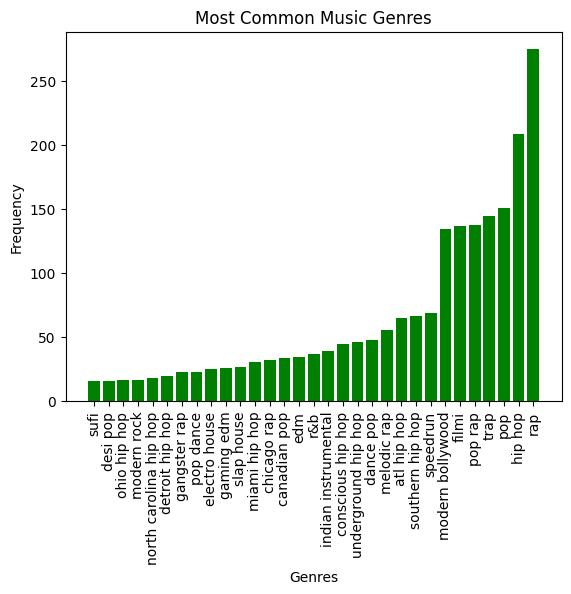

In [37]:
import matplotlib.pyplot as plt

genre_freq = {}

for genre_list in df['Artist Genres']:
    for g in genre_list:
        if g in genre_freq:
            genre_freq[g] += 1
        else:
            genre_freq[g] = 1

sorted_data = dict(sorted(genre_freq.items(), key=lambda x: x[1]))

genre_freq_filtered = {genre: frequency for genre, frequency in sorted_data.items() if frequency > 15}

plt.bar(genre_freq_filtered.keys(), genre_freq_filtered.values(), color='g')

# Set labels and title
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.title('Most Common Music Genres')

# Rotate the genre labels for better visibility
plt.xticks(rotation=90)

# Display the histogram
plt.show()

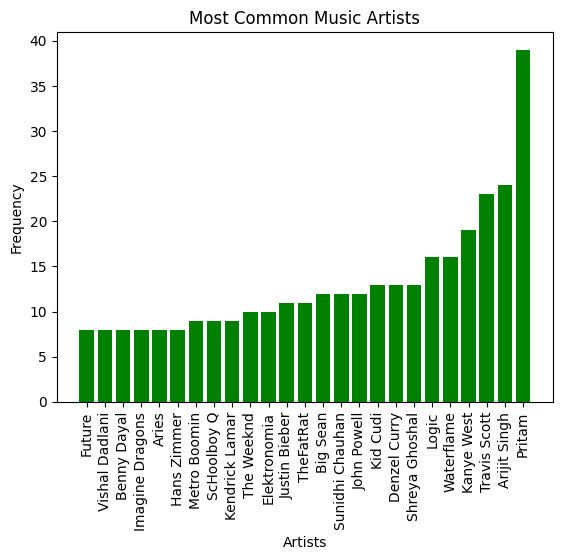

In [38]:
import re

artist_freq = {}

# Filter out artists' names with special characters
pattern = re.compile(r'^[a-zA-Z0-9\s]+$')  # Regular expression pattern to match alphanumeric characters and spaces

for artists in df['Artist Name']:
    for artist in artists:
        if re.match(pattern, artist):
            if artist in artist_freq:
                artist_freq[artist] += 1
            else:
                artist_freq[artist] = 1


sorted_data = dict(sorted(artist_freq.items(), key=lambda x: x[1]))

genre_freq_filtered = {genre: frequency for genre, frequency in sorted_data.items() if frequency > 7}

plt.bar(genre_freq_filtered.keys(), genre_freq_filtered.values(), color='g')

# Set labels and title
plt.xlabel('Artists')
plt.ylabel('Frequency')
plt.title('Most Common Music Artists')

# Rotate the genre labels for better visibility
plt.xticks(rotation=90)

# Display the histogram
plt.show()

# Processing

In [39]:
df['Rap Genre'] = df['Artist Genres'].apply(lambda x: 1 if re.search('|'.join(['drill', 'rap', 'hip hop']), ' '.join(x)) else 0)
df['Pop Genre'] = df['Artist Genres'].apply(lambda x: 1 if re.search('|'.join(['pop', 'dance', 'broadway', 'reggae fusion']), ' '.join(x)) else 0)
df['Rock Genre'] = df['Artist Genres'].apply(lambda x: 1 if re.search('|'.join(['rock', 'metalcore']), ' '.join(x)) else 0)
df['R&B Genre'] = df['Artist Genres'].apply(lambda x: 1 if re.search('|'.join(['r&b', 'blues', 'rhythm', 'dixieland', 'harlem']), ' '.join(x)) else 0)
df['Bollywood Genre'] = df['Artist Genres'].apply(lambda x: 1 if re.search('|'.join(['filmi', 'bollywood', 'indian', 'mollywood']), ' '.join(x)) else 0)
df['EDM Genre'] = df['Artist Genres'].apply(lambda x: 1 if re.search('|'.join(['edm', 'electro', 'nordic house', 'speedrun', 'gaming edm', 'dubstep', 'brostep']), ' '.join(x)) else 0)
df['Soundtrack Genre'] = df['Artist Genres'].apply(lambda x: 1 if re.search('|'.join(['orchestra', 'soundtrack', 'movie', 'hollywood', 'anime lo-fi']), ' '.join(x)) else 0)

In [40]:
# Tracks with genres but unlisted from above
df.loc[(df.iloc[:, 16:].sum(axis=1) == 0) & (df['Artist Genres'].map(len) != 0)]

Track Name              Artist Name  \
9              Tetris             [Derek King]   
490        Fire Again     [VALORANT, Ashnikko]   
519  Over the Rainbow  [Israel Kamakawiwo'ole]   
622        Your Woman             [White Town]   
768             Hello                   [OMFG]   

                              Artist Genres  Track Popularity Release Date  \
9                               [slow game]                51         2018   
490  [video game music, escape room, alt z]                68         2022   
519                     [ukulele, hawaiian]                76         2001   
622                           [derby indie]                70         1997   
768                               [otacore]                64         2014   

     danceability  energy  key  loudness  speechiness  ...  valence    tempo  \
9           0.791   0.581    1    -7.750       0.0790  ...    0.130   99.034   
490         0.516   0.789    0    -3.678       0.1630  ...    0.266   99.998   
519         0.671   0.153    0   -13.569       0.0404  ...    0.658   85.600   
622         0.815   0.605    5    -9.118       0.0368  ...    0.795  102.642   
768         0.844   0.864    7    -4.483       0.0348  ...    0.796  104.997   

               Playlist URI  Rap Genre  Pop Genre Rock Genre  R&B Genre  \
9    39yrrZvXXVTQjnv41mLZE5          0          0          0          0   
490  4KhumTd9QyJM3RUvAzSJh7          0          0          0          0   
519  1OzHjXm9IwK7dlQk1mXP2N          0          0          0          0   
622  2W4rSltujQSUyXT3Yu03ga          0          0          0          0   
768  0KAbqWJrRxqhaoYKVu2hDE          0          0          0          0   

     Bollywood Genre  EDM Genre  Soundtrack Genre  
9                  0          0                 0  
490                0          0                 0  
519                0          0                 0  
622                0          0                 0  
768                0          0                 0  

[5 rows x 23 columns]

# Visualize

In [41]:
df.columns

Index(['Track Name', 'Artist Name', 'Artist Genres', 'Track Popularity',
       'Release Date', 'danceability', 'energy', 'key', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'Playlist URI', 'Rap Genre', 'Pop Genre',
       'Rock Genre', 'R&B Genre', 'Bollywood Genre', 'EDM Genre',
       'Soundtrack Genre'],
      dtype='object')

In [43]:
from sklearn.preprocessing import StandardScaler
x = df.iloc[:, 3:].drop("Playlist URI", axis=1).values
x = StandardScaler().fit_transform(x) # normalizing the features

In [44]:
from sklearn.decomposition import PCA
pca_song = PCA(n_components=2)
principalComponents_songs = pca_song.fit_transform(x)

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not array(['39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '39yrrZvXXVTQjnv41mLZE5',
       '39yrrZvXXVTQjnv41mLZE5', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '12p5ArAxY6r3QOtNATi7Mx', '12p5ArAxY6r3QOtNATi7Mx',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '4KhumTd9QyJM3RUvAzSJh7', '4KhumTd9QyJM3RUvAzSJh7',
       '1OzHjXm9IwK7dlQk1mXP2N', '1OzHjXm9IwK7dlQk1mXP2N',
       '1OzHjXm9IwK7dlQk1mXP2N', '1OzHjXm9IwK7dlQk1mXP2N',
       '1OzHjXm9IwK7dlQk1mXP2N', '1OzHjXm9IwK7dlQk1mXP2N',
       '1OzHjXm9IwK7dlQk1mXP2N', '1OzHjXm9IwK7dlQk1mXP2N',
       '1OzHjXm9IwK7dlQk1mXP2N', '1OzHjXm9IwK7dlQk1mXP2N',
       '1OzHjXm9IwK7dlQk1mXP2N', '1OzHjXm9IwK7dlQk1mXP2N',
       '1OzHjXm9IwK7dlQk1mXP2N', '1OzHjXm9IwK7dlQk1mXP2N',
       '1OzHjXm9IwK7dlQk1mXP2N', '1OzHjXm9IwK7dlQk1mXP2N',
       '1OzHjXm9IwK7dlQk1mXP2N', '1OzHjXm9IwK7dlQk1mXP2N',
       '1OzHjXm9IwK7dlQk1mXP2N', '1OzHjXm9IwK7dlQk1mXP2N',
       '1OzHjXm9IwK7dlQk1mXP2N', '1OzHjXm9IwK7dlQk1mXP2N',
       '1OzHjXm9IwK7dlQk1mXP2N', '1OzHjXm9IwK7dlQk1mXP2N',
       '1OzHjXm9IwK7dlQk1mXP2N', '1OzHjXm9IwK7dlQk1mXP2N',
       '1OzHjXm9IwK7dlQk1mXP2N', '1OzHjXm9IwK7dlQk1mXP2N',
       '1OzHjXm9IwK7dlQk1mXP2N', '1OzHjXm9IwK7dlQk1mXP2N',
       '1OzHjXm9IwK7dlQk1mXP2N', '1OzHjXm9IwK7dlQk1mXP2N',
       '1OzHjXm9IwK7dlQk1mXP2N', '1OzHjXm9IwK7dlQk1mXP2N',
       '1OzHjXm9IwK7dlQk1mXP2N', '1OzHjXm9IwK7dlQk1mXP2N',
       '1OzHjXm9IwK7dlQk1mXP2N', '1OzHjXm9IwK7dlQk1mXP2N',
       '1OzHjXm9IwK7dlQk1mXP2N', '1OzHjXm9IwK7dlQk1mXP2N',
       '1OzHjXm9IwK7dlQk1mXP2N', '1OzHjXm9IwK7dlQk1mXP2N',
       '1OzHjXm9IwK7dlQk1mXP2N', '1OzHjXm9IwK7dlQk1mXP2N',
       '1OzHjXm9IwK7dlQk1mXP2N', '1OzHjXm9IwK7dlQk1mXP2N',
       '1OzHjXm9IwK7dlQk1mXP2N', '1OzHjXm9IwK7dlQk1mXP2N',
       '1OzHjXm9IwK7dlQk1mXP2N', '1OzHjXm9IwK7dlQk1mXP2N',
       '1OzHjXm9IwK7dlQk1mXP2N', '1OzHjXm9IwK7dlQk1mXP2N',
       '1OzHjXm9IwK7dlQk1mXP2N', '1OzHjXm9IwK7dlQk1mXP2N',
       '1OzHjXm9IwK7dlQk1mXP2N', '1OzHjXm9IwK7dlQk1mXP2N',
       '1OzHjXm9IwK7dlQk1mXP2N', '1OzHjXm9IwK7dlQk1mXP2N',
       '1OzHjXm9IwK7dlQk1mXP2N', '1OzHjXm9IwK7dlQk1mXP2N',
       '1OzHjXm9IwK7dlQk1mXP2N', '1OzHjXm9IwK7dlQk1mXP2N',
       '1OzHjXm9IwK7dlQk1mXP2N', '1OzHjXm9IwK7dlQk1mXP2N',
       '1OzHjXm9IwK7dlQk1mXP2N', '1OzHjXm9IwK7dlQk1mXP2N',
       '1OzHjXm9IwK7dlQk1mXP2N', '1OzHjXm9IwK7dlQk1mXP2N',
       '1OzHjXm9IwK7dlQk1mXP2N', '1OzHjXm9IwK7dlQk1mXP2N',
       '1OzHjXm9IwK7dlQk1mXP2N', '1OzHjXm9IwK7dlQk1mXP2N',
       '1OzHjXm9IwK7dlQk1mXP2N', '1OzHjXm9IwK7dlQk1mXP2N',
       '1OzHjXm9IwK7dlQk1mXP2N', '1OzHjXm9IwK7dlQk1mXP2N',
       '1OzHjXm9IwK7dlQk1mXP2N', '1OzHjXm9IwK7dlQk1mXP2N',
       '1OzHjXm9IwK7dlQk1mXP2N', '1OzHjXm9IwK7dlQk1mXP2N',
       '1OzHjXm9IwK7dlQk1mXP2N', '1OzHjXm9IwK7dlQk1mXP2N',
       '1OzHjXm9IwK7dlQk1mXP2N', '1OzHjXm9IwK7dlQk1mXP2N',
       '1OzHjXm9IwK7dlQk1mXP2N', '1OzHjXm9IwK7dlQk1mXP2N',
       '1OzHjXm9IwK7dlQk1mXP2N', '1OzHjXm9IwK7dlQk1mXP2N',
       '1OzHjXm9IwK7dlQk1mXP2N', '1OzHjXm9IwK7dlQk1mXP2N',
       '1OzHjXm9IwK7dlQk1mXP2N', '1OzHjXm9IwK7dlQk1mXP2N',
       '1OzHjXm9IwK7dlQk1mXP2N', '1OzHjXm9IwK7dlQk1mXP2N',
       '1OzHjXm9IwK7dlQk1mXP2N', '1OzHjXm9IwK7dlQk1mXP2N',
       '1OzHjXm9IwK7dlQk1mXP2N', '1OzHjXm9IwK7dlQk1mXP2N',
       '1OzHjXm9IwK7dlQk1mXP2N', '1OzHjXm9IwK7dlQk1mXP2N',
       '1OzHjXm9IwK7dlQk1mXP2N', '1OzHjXm9IwK7dlQk1mXP2N',
       '2W4rSltujQSUyXT3Yu03ga', '2W4rSltujQSUyXT3Yu03ga',
       '2W4rSltujQSUyXT3Yu03ga', '2W4rSltujQSUyXT3Yu03ga',
       '2W4rSltujQSUyXT3Yu03ga', '2W4rSltujQSUyXT3Yu03ga',
       '2W4rSltujQSUyXT3Yu03ga', '2W4rSltujQSUyXT3Yu03ga',
       '2W4rSltujQSUyXT3Yu03ga', '2W4rSltujQSUyXT3Yu03ga',
       '2W4rSltujQSUyXT3Yu03ga', '2W4rSltujQSUyXT3Yu03ga',
       '2W4rSltujQSUyXT3Yu03ga', '2W4rSltujQSUyXT3Yu03ga',
       '2W4rSltujQSUyXT3Yu03ga', '2W4rSltujQSUyXT3Yu03ga',
       '2W4rSltujQSUyXT3Yu03ga', '2W4rSltujQSUyXT3Yu03ga',
       '2W4rSltujQSUyXT3Yu03ga', '2W4rSltujQSUyXT3Yu03ga',
       '2W4rSltujQSUyXT3Yu03ga', '2W4rSltujQSUyXT3Yu03ga',
       '2W4rSltujQSUyXT3Yu03ga', '2W4rSltujQSUyXT3Yu03ga',
       '2W4rSltujQSUyXT3Yu03ga', '2W4rSltujQSUyXT3Yu03ga',
       '2W4rSltujQSUyXT3Yu03ga', '2W4rSltujQSUyXT3Yu03ga',
       '2W4rSltujQSUyXT3Yu03ga', '2W4rSltujQSUyXT3Yu03ga',
       '2W4rSltujQSUyXT3Yu03ga', '2W4rSltujQSUyXT3Yu03ga',
       '2W4rSltujQSUyXT3Yu03ga', '2W4rSltujQSUyXT3Yu03ga',
       '2W4rSltujQSUyXT3Yu03ga', '2W4rSltujQSUyXT3Yu03ga',
       '2W4rSltujQSUyXT3Yu03ga', '2W4rSltujQSUyXT3Yu03ga',
       '2W4rSltujQSUyXT3Yu03ga', '2W4rSltujQSUyXT3Yu03ga',
       '2W4rSltujQSUyXT3Yu03ga', '4Xwamd29v8Lij8tsP9jslm',
       '4Xwamd29v8Lij8tsP9jslm', '4Xwamd29v8Lij8tsP9jslm',
       '4Xwamd29v8Lij8tsP9jslm', '4Xwamd29v8Lij8tsP9jslm',
       '4Xwamd29v8Lij8tsP9jslm', '4Xwamd29v8Lij8tsP9jslm',
       '4Xwamd29v8Lij8tsP9jslm', '4Xwamd29v8Lij8tsP9jslm',
       '4Xwamd29v8Lij8tsP9jslm', '4Xwamd29v8Lij8tsP9jslm',
       '4Xwamd29v8Lij8tsP9jslm', '4Xwamd29v8Lij8tsP9jslm',
       '4Xwamd29v8Lij8tsP9jslm', '4Xwamd29v8Lij8tsP9jslm',
       '4Xwamd29v8Lij8tsP9jslm', '4Xwamd29v8Lij8tsP9jslm',
       '4Xwamd29v8Lij8tsP9jslm', '4Xwamd29v8Lij8tsP9jslm',
       '4Xwamd29v8Lij8tsP9jslm', '4Xwamd29v8Lij8tsP9jslm',
       '4Xwamd29v8Lij8tsP9jslm', '4Xwamd29v8Lij8tsP9jslm',
       '4Xwamd29v8Lij8tsP9jslm', '4Xwamd29v8Lij8tsP9jslm',
       '4Xwamd29v8Lij8tsP9jslm', '4Xwamd29v8Lij8tsP9jslm',
       '4Xwamd29v8Lij8tsP9jslm', '4Xwamd29v8Lij8tsP9jslm',
       '4Xwamd29v8Lij8tsP9jslm', '4Xwamd29v8Lij8tsP9jslm',
       '4Xwamd29v8Lij8tsP9jslm', '4Xwamd29v8Lij8tsP9jslm',
       '4Xwamd29v8Lij8tsP9jslm', '4Xwamd29v8Lij8tsP9jslm',
       '4Xwamd29v8Lij8tsP9jslm', '4Xwamd29v8Lij8tsP9jslm',
       '4Xwamd29v8Lij8tsP9jslm', '4Xwamd29v8Lij8tsP9jslm',
       '4Xwamd29v8Lij8tsP9jslm', '4Xwamd29v8Lij8tsP9jslm',
       '4Xwamd29v8Lij8tsP9jslm', '4Xwamd29v8Lij8tsP9jslm',
       '4Xwamd29v8Lij8tsP9jslm', '4Xwamd29v8Lij8tsP9jslm',
       '4Xwamd29v8Lij8tsP9jslm', '4Xwamd29v8Lij8tsP9jslm',
       '4Xwamd29v8Lij8tsP9jslm', '4Xwamd29v8Lij8tsP9jslm',
       '4Xwamd29v8Lij8tsP9jslm', '4Xwamd29v8Lij8tsP9jslm',
       '4Xwamd29v8Lij8tsP9jslm', '4Xwamd29v8Lij8tsP9jslm',
       '4Xwamd29v8Lij8tsP9jslm', '2K1GpNap0DQs2BsTwbGGPI',
       '2K1GpNap0DQs2BsTwbGGPI', '2K1GpNap0DQs2BsTwbGGPI',
       '2K1GpNap0DQs2BsTwbGGPI', '2K1GpNap0DQs2BsTwbGGPI',
       '2K1GpNap0DQs2BsTwbGGPI', '2K1GpNap0DQs2BsTwbGGPI',
       '2K1GpNap0DQs2BsTwbGGPI', '2K1GpNap0DQs2BsTwbGGPI',
       '2K1GpNap0DQs2BsTwbGGPI', '2K1GpNap0DQs2BsTwbGGPI',
       '2K1GpNap0DQs2BsTwbGGPI', '2K1GpNap0DQs2BsTwbGGPI',
       '2K1GpNap0DQs2BsTwbGGPI', '2K1GpNap0DQs2BsTwbGGPI',
       '2K1GpNap0DQs2BsTwbGGPI', '2K1GpNap0DQs2BsTwbGGPI',
       '2K1GpNap0DQs2BsTwbGGPI', '2K1GpNap0DQs2BsTwbGGPI',
       '2K1GpNap0DQs2BsTwbGGPI', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE',
       '0KAbqWJrRxqhaoYKVu2hDE', '0KAbqWJrRxqhaoYKVu2hDE'], dtype=object)

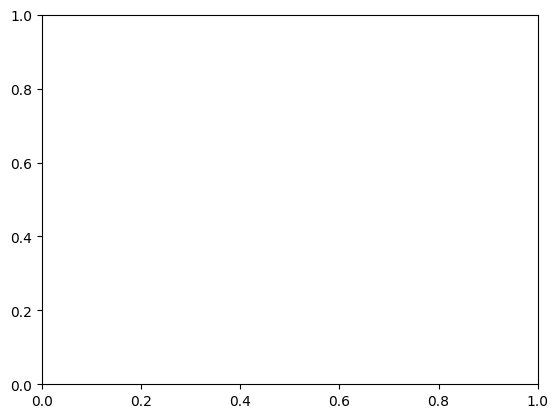

In [60]:
principal_song_df = pd.DataFrame(data = principalComponents_songs)

plt.scatter(principal_song_df[0], principal_song_df[1], c=df['Playlist URI'].values)

# Add labels and title to the plot
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA Scatter Plot')